<a href="https://colab.research.google.com/github/deeksha-4/Projects/blob/main/Neural_Network_PyTorch/PyTorch_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Neural Network using PyTorch**

In this project, I have used PyTorch to implement a neural network that can perform binary classification on a set of images (is/is not)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# importing the libraries

import os
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [3]:
# loading the dataset

def getdata(path):
  data = torch.tensor([])
  file_list = os.listdir(path)
  for file_name in file_list[:350]:
    image_path = os.path.join(path, file_name)
    image = mpimg.imread(image_path)
    imageData = torch.from_numpy(image).long()
    data = torch.cat((data, imageData.unsqueeze(0)), dim=0)
  return data

pizza_path = '/content/drive/MyDrive/pizza_vs_not/pizza'
not_pizza_path = '/content/drive/MyDrive/pizza_vs_not/not_pizza'

not_pizza_data = getdata(not_pizza_path)
pizza_data = getdata(pizza_path)

<ipython-input-3-74fa5da8071c>:9: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at ../torch/csrc/utils/tensor_numpy.cpp:206.)
  imageData = torch.from_numpy(image).long()


In [4]:
# splitting into train and test data

train_data = torch.cat((pizza_data[:300], not_pizza_data[:200]), dim = 0)
test_data = torch.cat((pizza_data[300:350], not_pizza_data[200:250]), dim = 0)

In [7]:
# reshaping

reshaped_train_data = torch.reshape(train_data, (500, 64*64*3))
reshaped_test_data = torch.reshape(test_data, (100, 64*64*3))
final_train_data = reshaped_train_data/255
final_test_data = reshaped_test_data/255

print(final_train_data.shape, final_test_data.shape)

torch.Size([500, 12288]) torch.Size([100, 12288])


In [9]:
# creating labels

train_labels = torch.reshape(torch.cat((torch.ones(300), torch.zeros(200)), axis = 0), (500, 1))
test_labels = torch.reshape(torch.cat((torch.ones(50), torch.zeros(50)), axis = 0), (100, 1))

print(train_labels.shape, test_labels.shape)

torch.Size([500, 1]) torch.Size([100, 1])


In [11]:
# building the neural network

# initializing hyperparameters
D_in = 64*64*3
H1 = 10
H2 = 12
D_out = 1

# defining the model
model = torch.nn.Sequential(
    nn.Linear(D_in, H1),
    nn.ReLU(),
    nn.Linear(H1, H2),
    nn.ReLU(),
    nn.Linear(H2, D_out),
    nn.Sigmoid()
)

In [13]:
# training the model

loss_fn = nn.BCELoss()
learning_rate = 0.005
iterations = 10000

for i in range(iterations):
  y_pred = model(final_train_data)
  loss = loss_fn(y_pred, train_labels)

  if i%1000 == 1:
    print(loss)

  model.zero_grad()
  loss.backward()
  with torch.no_grad():
    for p in model.parameters():
      p -= learning_rate * p.grad
  torch.save(model, 'model_best.pt')

tensor(0.6858, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2828, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1038, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0418, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0224, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0126, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0067, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0044, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0032, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0025, grad_fn=<BinaryCrossEntropyBackward0>)


Index 49 is a pizza


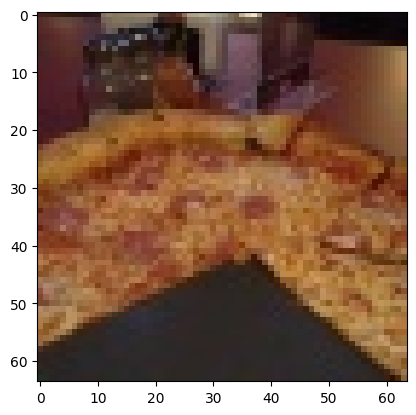

In [14]:
# testing

index = 49
plt.imshow(test_data[index].int())
print(f'Index {index} is {"a pizza" if model(final_test_data[index]) > 0.5 else "not a pizza"}' )

In [15]:
# calculating accuracy

def predict(model, data, labels):
    probabilities = model(data)
    predictions = (probabilities > 0.5).float()
    print(str(torch.sum((predictions == labels)).item()/predictions.shape[0]))

print("Training accuracy: ", end = '')
predict(model, final_train_data, train_labels)
print("Testing accuracy: ", end = '')
predict(model,final_test_data,test_labels)

Training accuracy: 1.0
Testing accuracy: 0.77
